In [56]:
##import libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [57]:
##load dataset

df = pd.read_csv("/Users/xlade/Desktop/Amdari/Internship/Project_2_Jewelry_Price_Optimization/Jewelry_Dataset.csv")
#df.head(5)

In [58]:
## Assign column names to the dataset

df.columns = [
    "Order_Datetime",
    "Order_ID",
    "Product_ID",
    'SKU_Quantity',
    'Category_ID',
    'Category',
    'Brand_ID',
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color", 
    "Main_metal",
    "Main_Gem"
]

In [59]:
df.head(5)

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [60]:
## check for missing values
df.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_metal         5462
Main_Gem          34058
dtype: int64

In [61]:
#know the data shape

df.shape

(95910, 13)

In [62]:
## check fro duplicated rows
df.duplicated().sum()

2589

In [63]:
## check nunique values
df.nunique()

Order_Datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_metal            3
Main_Gem             30
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [65]:
df.describe()

,Order_ID,Product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [66]:
## drop duplicated rows
df = df.drop_duplicates()


In [67]:
#check the isnull values again
df.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5232
Category           9837
Brand_ID           4675
Price_USD          5232
User_ID            5232
Target_Gender     46275
Main_Color         7277
Main_metal         5339
Main_Gem          32435
dtype: int64

In [68]:
## Look through category feature
df["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [69]:
##filter out the real categories

real_categories = df["Category"].unique().tolist()
real_categories = [c for c in real_categories if isinstance(c, str) and "jewelry" in c ]
real_categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [70]:
df_category = df.loc[df["Category"].isin(real_categories)]
df_category

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,jewelry.earring,0.0,150.55,1.515916e+18,NaN,red,gold,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95900,2021-12-01 09:32:35 UTC,2719009022110859402,1956663836207481431,1,1.806829e+18,jewelry.ring,0.0,145.62,1.515916e+18,NaN,red,gold,NaN
95903,2021-12-01 09:37:28 UTC,2719011482355368159,1956663847389495299,1,1.806829e+18,jewelry.earring,0.0,301.23,1.515916e+18,NaN,red,gold,amethyst
95907,2021-12-01 09:52:06 UTC,2719018846999544322,1956663848219968336,1,1.806829e+18,jewelry.earring,1.0,630.00,1.515916e+18,f,white,gold,diamond
95908,2021-12-01 09:55:35 UTC,2719020596963836492,1835566854106513435,1,1.806829e+18,jewelry.earring,0.0,83.42,1.515916e+18,NaN,white,gold,fianit


In [71]:
## haven filtered out the wrong cats check  isnull again
df_category.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID           0
Category              0
Brand_ID           3368
Price_USD             0
User_ID               0
Target_Gender     34373
Main_Color         1875
Main_metal           86
Main_Gem          18084
dtype: int64

In [72]:
## check Target gender
df_category["Target_Gender"].value_counts()

Target_Gender
f    43471
m      243
Name: count, dtype: int64

In [73]:
df_category["Target_Gender"] = df_category["Target_Gender"].fillna(df_category["Target_Gender"].mode()[0])

In [74]:
df_category.head(5)

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,f,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,f,red,gold,NaN
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,jewelry.earring,0.0,150.55,1.515916e+18,f,red,gold,diamond


In [75]:
df_category.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_ID            0
SKU_Quantity          0
Category_ID           0
Category              0
Brand_ID           3368
Price_USD             0
User_ID               0
Target_Gender         0
Main_Color         1875
Main_metal           86
Main_Gem          18084
dtype: int64

In [76]:
df_category.shape

(78087, 13)

In [77]:
## drop the rest of thr null rows

df_category = df_category.dropna()

In [78]:
## confirm the isnull is gone
df_category.isnull().sum()

Order_Datetime    0
Order_ID          0
Product_ID        0
SKU_Quantity      0
Category_ID       0
Category          0
Brand_ID          0
Price_USD         0
User_ID           0
Target_Gender     0
Main_Color        0
Main_metal        0
Main_Gem          0
dtype: int64

In [79]:
## confirm the new data size

df_category.shape

(57372, 13)

In [80]:
## Observe the unique values again

df_category.nunique()

Order_Datetime    47096
Order_ID          47129
Product_ID         5653
SKU_Quantity          1
Category_ID          10
Category              7
Brand_ID              4
Price_USD          1821
User_ID           22562
Target_Gender         2
Main_Color            3
Main_metal            1
Main_Gem             29
dtype: int64

In [81]:
df_category.head(5)

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,f,red,gold,amethyst
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,jewelry.earring,0.0,150.55,1.515916e+18,f,red,gold,diamond
6,2018-12-02 22:16:20 UTC,1925764002260976330,1835566854106513435,1,1.806829e+18,jewelry.earring,0.0,83.42,1.515916e+18,f,white,gold,fianit


## Univariate Analysis

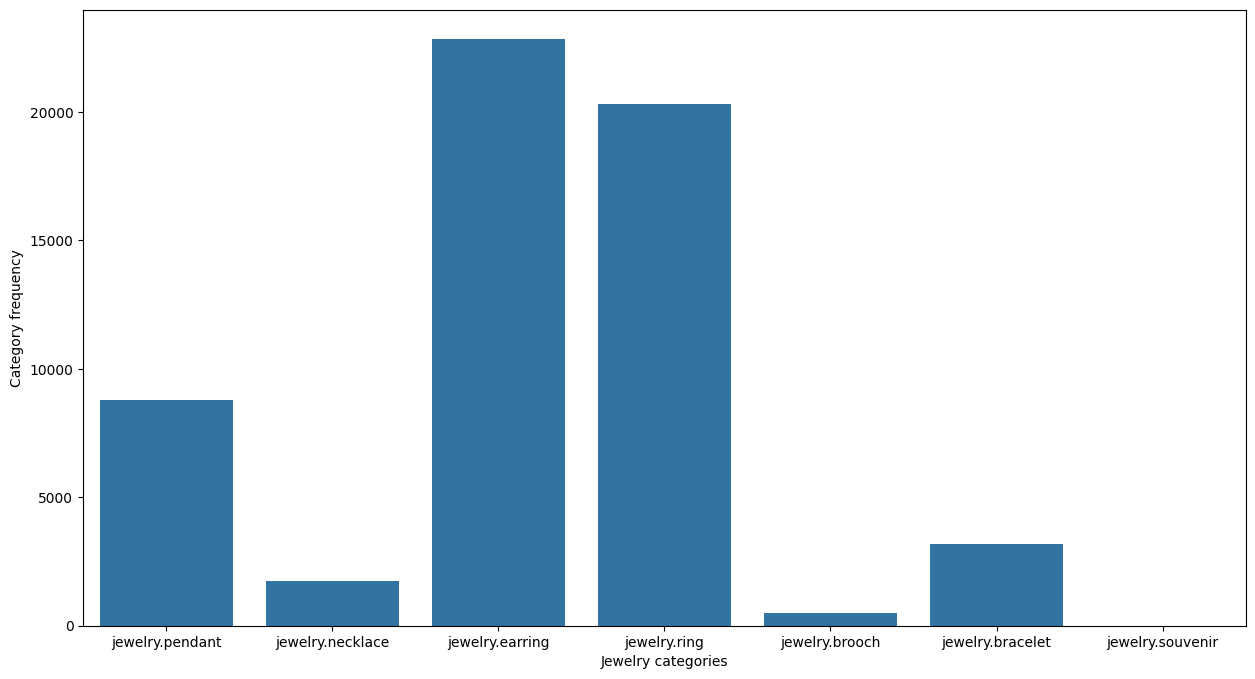

In [82]:
## category count plot

plt.figure(figsize = (15, 8))

sns.countplot(data = df_category, x = "Category")

plt.xlabel("Jewelry categories")
plt.ylabel("Category frequency")

plt.show(); plt.close()

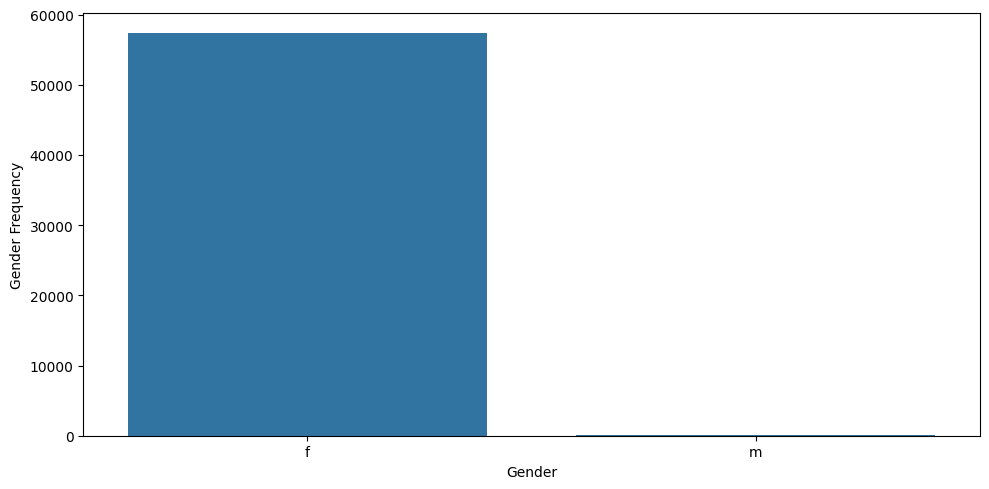

In [83]:
## visualize target gender

plt.figure(figsize = (10, 5))

sns.countplot(data = df_category, x = "Target_Gender")

plt.xlabel("Gender")
plt.ylabel("Gender Frequency")

plt.tight_layout()
plt.show()



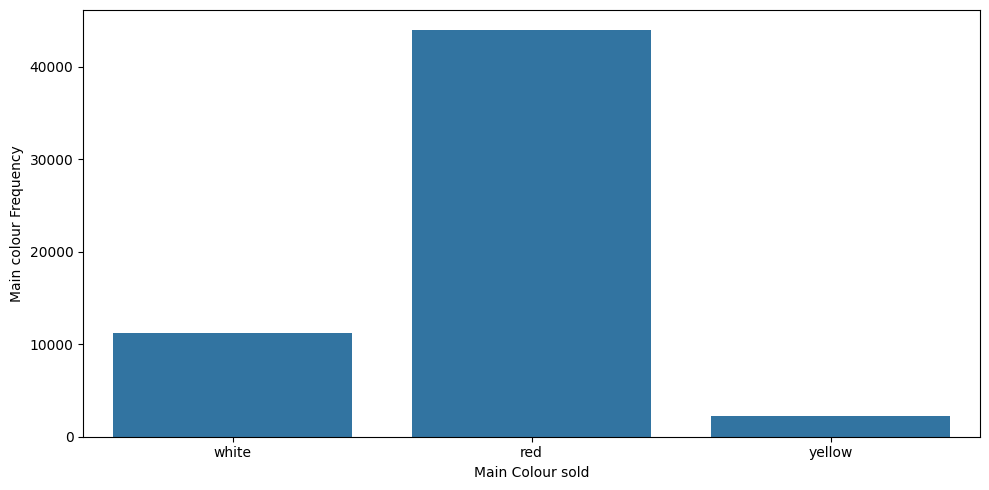

In [84]:
## visualize target gender

plt.figure(figsize = (10, 5))

sns.countplot(data = df_category, x = "Main_Color")

plt.xlabel("Main Colour sold")
plt.ylabel("Main colour Frequency")

plt.tight_layout()
plt.show()

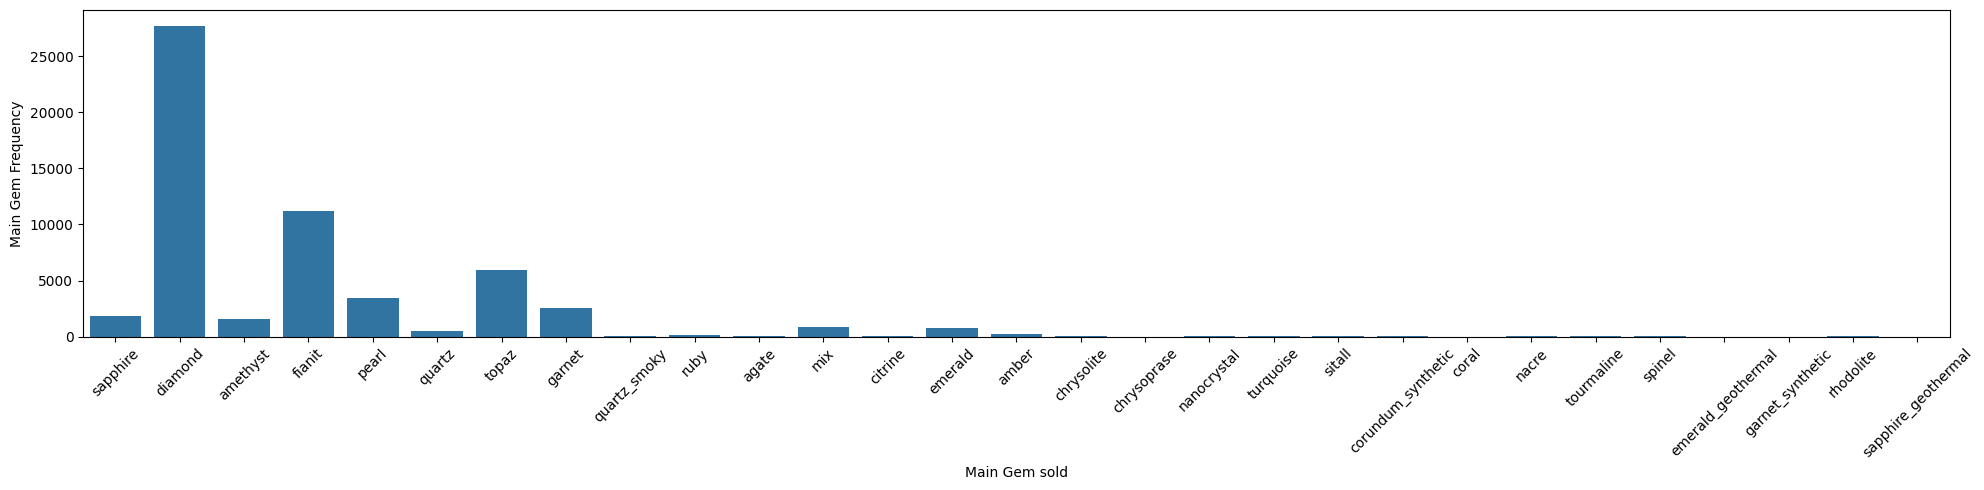

In [85]:
## visualize target gender

plt.figure(figsize = (20, 5))

sns.countplot(data = df_category, x = "Main_Gem")

plt.xlabel("Main Gem sold")
plt.ylabel("Main Gem Frequency")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Bivariate Analysis

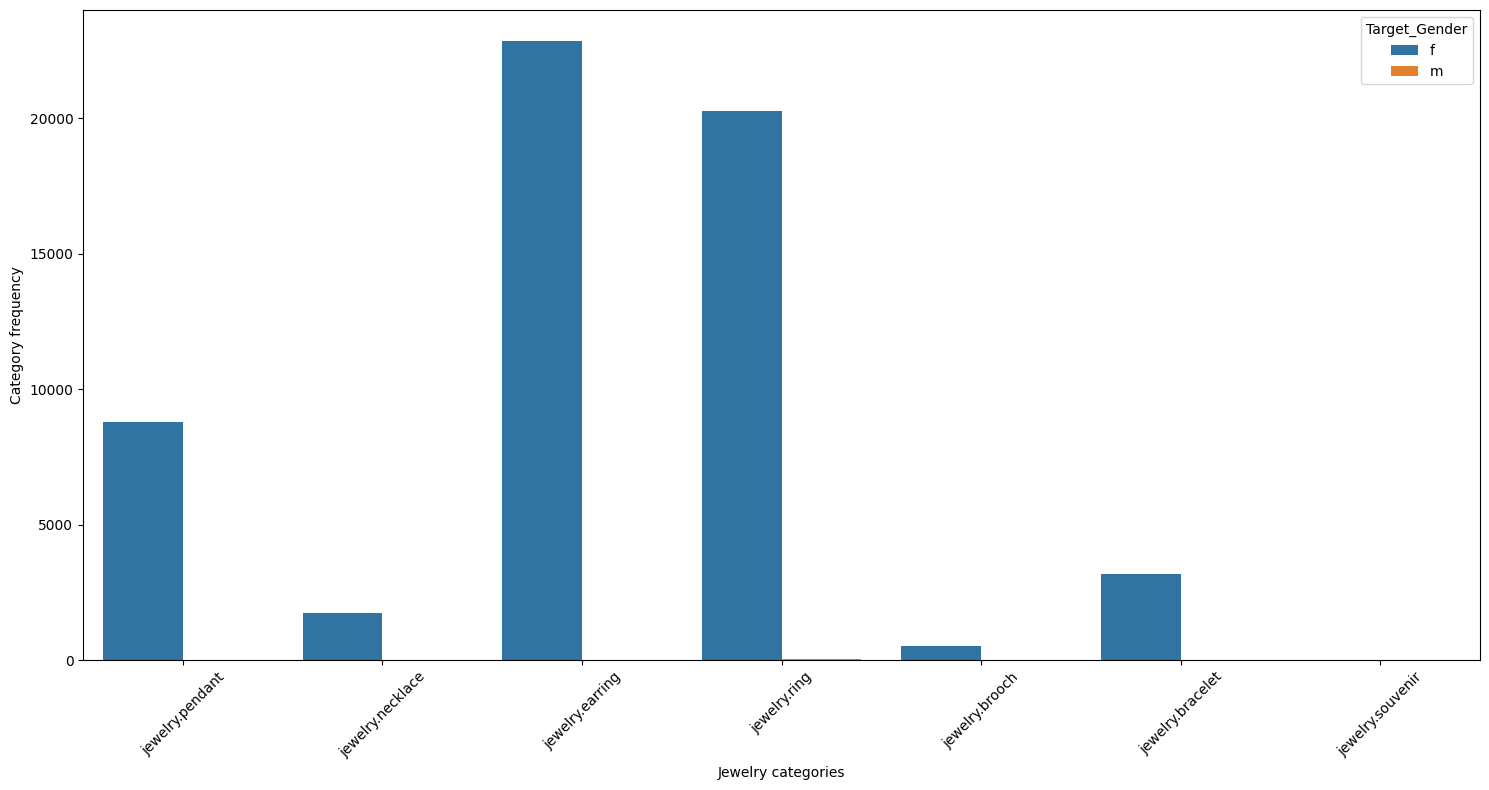

In [86]:
## category count plot

plt.figure(figsize = (15, 8))

sns.countplot(data = df_category, x = "Category", hue="Target_Gender")

plt.xlabel("Jewelry categories")
plt.ylabel("Category frequency")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show(); plt.close()

## Feature Engineering

In [87]:
## Label Encoding

from sklearn.preprocessing import LabelEncoder

In [88]:
## Encode the categorical variables

le = LabelEncoder()

df_category["Category"] = le.fit_transform(df_category["Category"])
df_category["Target_Gender"] = le.fit_transform(df_category["Target_Gender"])
df_category["Main_Color"] = le.fit_transform(df_category["Main_Color"])
df_category["Main_metal"] = le.fit_transform(df_category["Main_metal"])
df_category["Main_Gem"] = le.fit_transform(df_category["Main_Gem"])

In [89]:
##confirm that the features are now encoded

df_category.head(5)

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,4,1.0,54.66,1.515916e+18,0,1,0,22
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,4,0.0,88.90,1.515916e+18,0,0,0,8
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,3,0.0,417.67,1.515916e+18,0,0,0,2
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,0,0,0,8
6,2018-12-02 22:16:20 UTC,1925764002260976330,1835566854106513435,1,1.806829e+18,2,0.0,83.42,1.515916e+18,0,1,0,11


In [90]:
## feature correlation
correlation = df_category.drop(labels=["Order_Datetime", "SKU_Quantity", "Main_metal"], axis = 1).corr(method = "spearman")

In [91]:
correlation

,Order_ID,Product_ID,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Gem
Order_ID,1.000000,-0.063453,0.002955,-0.036750,0.000714,0.068032,0.693998,-0.014006,-0.030074,-0.007545
Product_ID,-0.063453,1.000000,-0.079899,0.071659,-0.211245,0.010001,-0.030058,0.012402,0.010177,-0.077768
Category_ID,0.002955,-0.079899,1.000000,-0.358719,0.030991,-0.235721,0.023580,-0.028720,-0.052354,0.079487
Category,-0.036750,0.071659,-0.358719,1.000000,0.046453,-0.026626,-0.039387,0.034694,0.054854,-0.170466
Brand_ID,0.000714,-0.211245,0.030991,0.046453,1.000000,0.020637,-0.007337,0.050107,-0.133118,0.028570
Price_USD,0.068032,0.010001,-0.235721,-0.026626,0.020637,1.000000,-0.024389,0.036195,0.165373,-0.340696
User_ID,0.693998,-0.030058,0.023580,-0.039387,-0.007337,-0.024389,1.000000,-0.007885,-0.027794,0.005101
Target_Gender,-0.014006,0.012402,-0.028720,0.034694,0.050107,0.036195,-0.007885,1.000000,-0.016105,-0.024232
Main_Color,-0.030074,0.010177,-0.052354,0.054854,-0.133118,0.165373,-0.027794,-0.016105,1.000000,-0.150451
Main_Gem,-0.007545,-0.077768,0.079487,-0.170466,0.028570,-0.340696,0.005101,-0.024232,-0.150451,1.000000


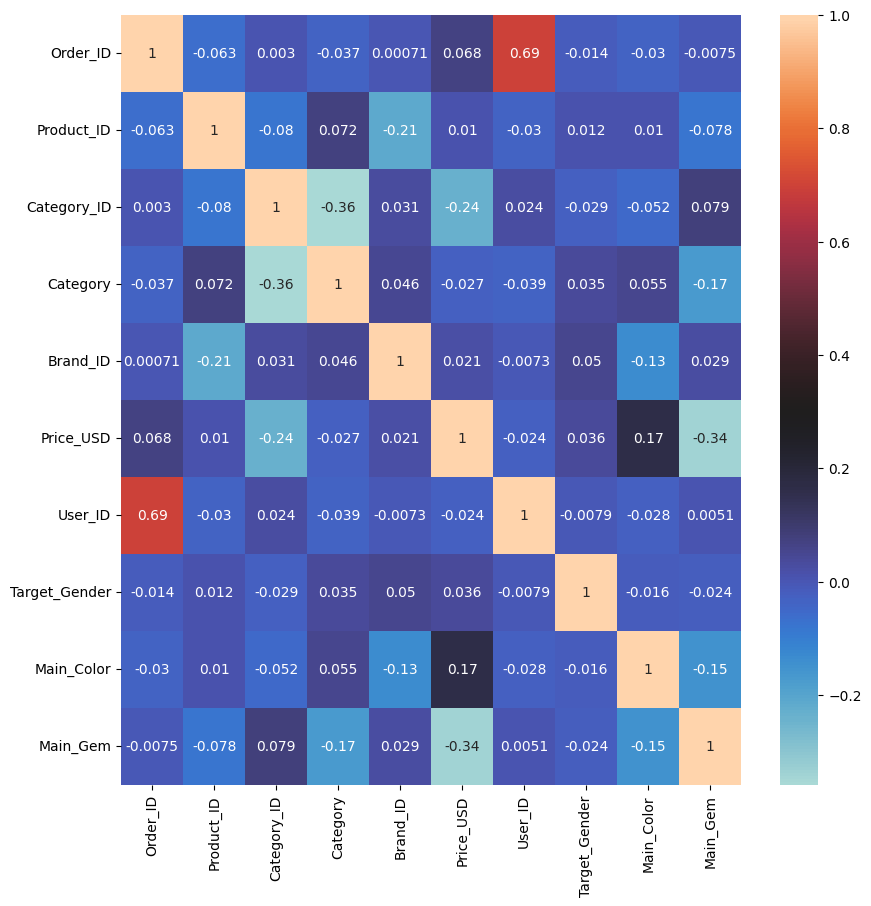

In [92]:
## correlation heatmap

plt.figure(figsize = (10,10))

sns.heatmap(correlation, annot = True, center = .3)

plt.show(); plt.close()

In [93]:
invariant_column = df_category.nunique()[df_category.nunique() == 1].index.tolist()
invariant_column

['SKU_Quantity', 'Main_metal']

In [94]:
## Drop columns with nunique == 1

df_category.drop(labels=invariant_column, axis = 1, inplace=True)

In [95]:
columns_to_eliminate = ["Order_Datetime", "Order_ID", "Product_ID", "Category_ID", "User_ID"]

In [96]:
df_category.drop(labels=columns_to_eliminate, axis = 1, inplace=True)

In [97]:
df_category.head(5)

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Gem
1,4,1.0,54.66,0,1,22
2,4,0.0,88.90,0,0,8
3,3,0.0,417.67,0,0,2
5,2,0.0,150.55,0,0,8
6,2,0.0,83.42,0,1,11


In [98]:
### Seperate label from the rest of the data

df1 = df_category[["Category", "Brand_ID", "Target_Gender", "Main_Color", "Main_Gem"]]
label = df_category[["Price_USD"]]

In [99]:
df1.head(5)

,Category,Brand_ID,Target_Gender,Main_Color,Main_Gem
1,4,1.0,0,1,22
2,4,0.0,0,0,8
3,3,0.0,0,0,2
5,2,0.0,0,0,8
6,2,0.0,0,1,11


In [100]:
label.head(5)

,Price_USD
1,54.66
2,88.90
3,417.67
5,150.55
6,83.42


## Machine Learning

In [101]:
## import 
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer


#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# for data preprocessing
from sklearn.model_selection import train_test_split

# Classifier Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

from sklearn.preprocessing import PowerTransformer



In [102]:
import mlflow
import mlflow.sklearn  # Use the relevant MLflow module for your model type
import os

In [103]:

# Set the tracking URI to the new folder inside Jewelry_Price_Optimization
mlflow.set_tracking_uri("file:///Users/xlade/Desktop/Amdari/Internship/Jewelry_Price_Optimization/mlruns_storage")
mlflow.set_experiment("Test_Experiment")

Traceback (most recent call last):
  File "/Users/xlade/Library/Python/3.9/lib/python/site-packages/mlflow/store/tracking/file_store.py", line 328, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/Users/xlade/Library/Python/3.9/lib/python/site-packages/mlflow/store/tracking/file_store.py", line 422, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/Users/xlade/Library/Python/3.9/lib/python/site-packages/mlflow/store/tracking/file_store.py", line 1368, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/Users/xlade/Library/Python/3.9/lib/python/site-packages/mlflow/store/tracking/file_store.py", line 1361, in _read_helper
    result = read_yaml(root, file_name)
  File "/Users/xlade/Library/Python/3.9/lib/python/site-packages/mlflow/utils/file_utils.py", line 310, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.e

<Experiment: artifact_location='file:///Users/xlade/Desktop/Amdari/Internship/Jewelry_Price_Optimization/mlruns_storage/695669335625361237', creation_time=1733439765337, experiment_id='695669335625361237', last_update_time=1733439765337, lifecycle_stage='active', name='Test_Experiment', tags={}>

In [104]:
# split the dataset into training and test sets x = questions, Y = Answers

X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size = 0.1, random_state = 42)

In [105]:
# module building

#logistic regression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

lin_y_pred = linreg.predict(X_test)

print("Linear Regression")

print("Mean Absolute Error:", mean_absolute_error(y_test, lin_y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, lin_y_pred))
print("R2 Score:", r2_score(y_test, lin_y_pred))
#print("Accuracy:", accuracy_score(y_test, lin_y_pred))
#print("Precision:", precision_score(y_test, lin_y_pred))
#print("Recall:", recall_score(y_test, lin_y_pred))
#print("F1-score:", f1_score(y_test, lin_y_pred))
#print("AUC-ROC:", roc_auc_score(y_test, lin_y_pred))

Linear Regression
Mean Absolute Error: 241.02024140008916
Mean Squared Error: 278047.4961106009
R2 Score: 0.038900549467926315


In [106]:
# module building

#Adaboost regression

adaboost = AdaBoostRegressor(loss = "exponential", n_estimators=1000, learning_rate=0.1)

adaboost.fit(X_train, y_train)

adaboost_y_pred = adaboost.predict(X_test)

print("Adaboost Regression")

print("Mean Absolute Error:", mean_absolute_error(y_test, adaboost_y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, adaboost_y_pred))
print("R2 Score:", r2_score(y_test, adaboost_y_pred))


Adaboost Regression
Mean Absolute Error: 261.35213266247285
Mean Squared Error: 210860.99916197802
R2 Score: 0.27113750971305894


In [107]:
# module building

#Catboost regression

catboost = CatBoostRegressor(loss_function = "RMSE", iterations=10000, learning_rate=0.1, one_hot_max_size = 2, depth=6, verbose=0)

catboost.fit(X_train, y_train)

catboost_y_pred = catboost.predict(X_test)

print("Catboost Regression")

print("Mean Absolute Error:", mean_absolute_error(y_test, catboost_y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, catboost_y_pred))
print("R2 Score:", r2_score(y_test, catboost_y_pred))


Catboost Regression
Mean Absolute Error: 181.85926599614933
Mean Squared Error: 176924.44526469114
R2 Score: 0.38844265994775284


In [108]:
# module building

#Extra Trees regression

ext = ExtraTreesRegressor(criterion="friedman_mse", n_estimators=1000, bootstrap = True, max_depth=10)

ext.fit(X_train, y_train)

ext_y_pred = ext.predict(X_test)

print("Extra Tree Regressor")

print("Mean Absolute Error:", mean_absolute_error(y_test, ext_y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, ext_y_pred))
print("R2 Score:", r2_score(y_test, ext_y_pred))


Extra Tree Regressor
Mean Absolute Error: 185.79052122879895
Mean Squared Error: 179938.416678791
R2 Score: 0.3780245612037221
